<a href="https://colab.research.google.com/github/oussema321/Iris_classification/blob/main/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


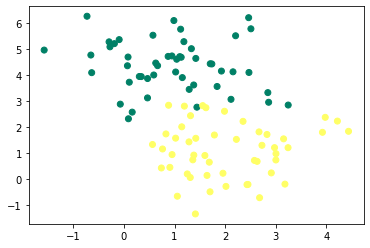

In [ ]:
X, y =make_blobs(n_samples=100,n_features=2 ,centers=2,random_state=0 )
y =y.reshape((y.shape[0],1))


print('dimensions de X:',X.shape)
print('dimensions de y:',y.shape)


plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

Fonction d'initialisation

In [ ]:
def initialisation(X):
  W=np.random.randn(X.shape[1],1)
  b=np.random.randn(1)
  return (W,b)

In [ ]:
W,b=initialisation(X)
print(W.shape)
print(b.shape)

(2, 1)
(1,)


Fonction model

In [ ]:
def model(X,W,b):
  Z = X.dot(W) +b
  A=1/(1+np.exp(-Z))
  return A

In [ ]:
A= model(X,W,b)
A.shape

(100, 1)

Fonction cout

In [ ]:
def log_loss(A,y):
  return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [ ]:
log_loss(A,y)

0.27257610468245874

Fonction des gradients

In [ ]:
def gradients(A,X,y):
  dw=1/len(y)*np.dot(X.T,A-y)
  db=1/len(y)*np.sum(A-y)
  return (dw,db)

In [ ]:
dw,db=gradients(A,X,y)
print(dw.shape)
print(db.shape)

(2, 1)
()


 Fonction update

In [ ]:
def update(dw,db,W,b,learning_rate):
  W=W-learning_rate*dw
  b=b-learning_rate*b
  return (W,b)

Fonction de prediction

In [ ]:
def predict(X,W,b):
  A=model(X,W,b)
  #print(A)#ecrire la probabiliter associer
  return A >= 0.5

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=100):
  #intialiser W et b
  W ,b=initialisation(X)
  history=[]
  Loss=[]
  #apprentissage
  for i in range(n_iter):
    A=model(X,W,b)
    Loss.append(log_loss(A,y))
    dw,db=gradients(A,X,y)
    w,b=update(dw,db,W,b,learning_rate)
    history.append([W,b,Loss,i])

  y_pred = predict(X,W,b)
  print(accuracy_score(y,y_pred))
  plt.plot(Loss)
  plt.show

  return W,b

0.29


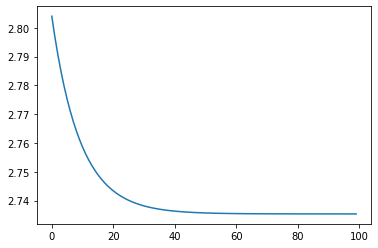

In [ ]:
W,b=artificial_neuron(X,y)

In [ ]:
#enregistrer les pararmtres W et b
W ,b

(array([[-0.50432932],
        [ 1.19454604]]), array([6.55923424e-06]))

Tester le model

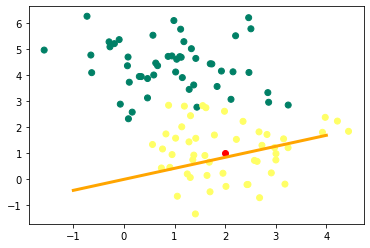

array([ True])

In [ ]:
new_plant =np.array([2,1])
#tracer la frontiere de decision
x0=np.linspace(-1,4,140)
x1=(-W[0]*x0-b)/W[1]
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='R',cmap='summer')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
predict(new_plant,W,b)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()